In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import datetime
import sys
import io
import requests

# Por desgracia, los ficheros CSV no están publicados, sólo un link para descarga, por lo
# que tendremos que guardar el contenido en un String para después tratarlo como un fichero
# usando io.StringIO.
# https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
contenido_descarga = requests.get(url).content

df = pd.read_csv(
    io.StringIO(contenido_descarga.decode('utf-8')),
    parse_dates=['dateRep'], 
    dayfirst=True,
    index_col='dateRep'
)
df.sort_index(inplace=True)

# Calculamos incidencia por país por cada 100.000 habitantes
df['cases/100_000'] = df['cases'] / df['popData2019'] * 100_0000
df['deaths/100_000'] = df['deaths'] / df['popData2019'] * 100_0000


In [2]:
# Sumarizamos casos diarios por continente.
df_continente = df[['continentExp', 'cases', 'deaths']].groupby(['dateRep', 'continentExp']).sum()
df_continente.reset_index(drop=False, inplace=True)

# Calculamos población por continente (para cada país seleccionamos su valor máximo)
df_continente['popData2019'] = 0
for continente in df['continentExp'].unique():
    poblacion_continente = df[df['continentExp'] == continente].groupby(['countriesAndTerritories']).max()['popData2019'].sum()
    df_continente.loc[df_continente['continentExp'] == continente, 'popData2019'] = poblacion_continente

df_continente.set_index(['dateRep'], inplace=True)
df_continente.sort_index(inplace=True)
    
# Calculamos incidencia nuevos casos diarios por continente por cada 100.000 habitantes
df_continente['cases/100_000'] = df_continente['cases'] / df_continente['popData2019'] * 100_0000
df_continente['deaths/100_000'] = df_continente['deaths'] / df_continente['popData2019'] * 100_0000

In [3]:
# Sumarizamos casos diarios del planeta.
df_planeta = df[['continentExp', 'cases', 'deaths']].groupby(['dateRep']).sum()
df_planeta.reset_index(drop=False, inplace=True)

# Calculamos población del planeta (para cada país seleccionamos su valor máximo)
df_planeta['popData2019'] = 0
poblacion_planeta = df.groupby(['countriesAndTerritories']).max()['popData2019'].sum()
df_planeta.loc[:, 'popData2019'] = poblacion_planeta

df_planeta.set_index(['dateRep'], inplace=True)
df_planeta.sort_index(inplace=True)

# Calculamos incidencia nuevos casos diarios por cada 100.000 habitantes
df_planeta['cases/100_000'] = df_planeta['cases'] / df_planeta['popData2019'] * 100_0000
df_planeta['deaths/100_000'] = df_planeta['deaths'] / df_planeta['popData2019'] * 100_0000


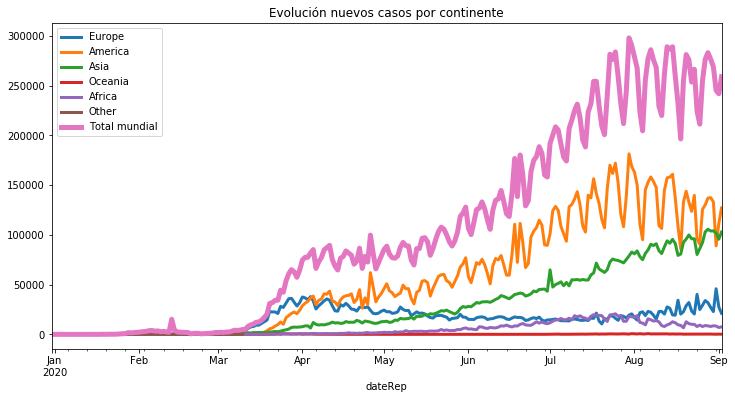

In [4]:
# Evolución nuevos casos por continente.
for continente in df['continentExp'].unique():
    df[(df['continentExp'] == continente)]['cases'] \
        .groupby(['dateRep'])                       \
        .sum()                                      \
        .plot(figsize=(12, 6), lw=3, title="Evolución nuevos casos por continente", legend=True, label=continente)
    
# Evolución nuevos casos mundial.
df['cases'].groupby(['dateRep']).sum().plot(lw=5, legend=True, label='Total mundial')

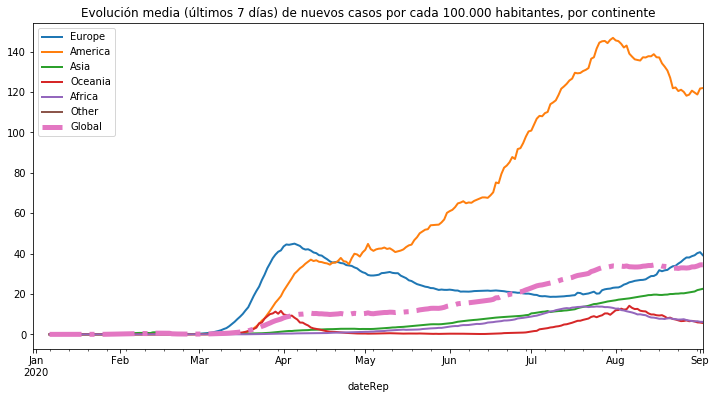

In [5]:
for continente in df['continentExp'].unique():
    df_continente[(df_continente['continentExp'] == continente)]['cases/100_000'].rolling(7).mean().plot(figsize=(12, 6), lw=2, title="Evolución media (últimos 7 días) de nuevos casos por cada 100.000 habitantes, por continente", legend=True, label=f'{continente}')


df_planeta['cases/100_000'].rolling(7).mean().plot(figsize=(12, 6),style='-.', lw=5, title="Evolución media (últimos 7 días) de nuevos casos por cada 100.000 habitantes, por continente", legend=True, label='Global')

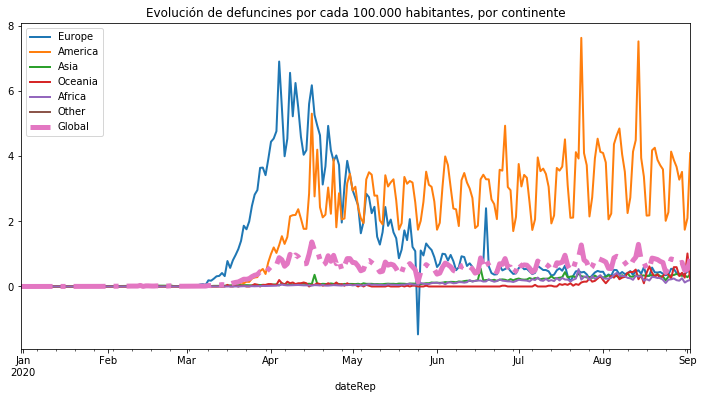

In [14]:
for continente in df['continentExp'].unique():
    df_continente[(df_continente['continentExp'] == continente)]['deaths/100_000'].plot(figsize=(12, 6), lw=2, title="Evolución de defunciones por cada 100.000 habitantes, por continente", legend=True, label=f'{continente}')


df_planeta['deaths/100_000'].plot(figsize=(12, 6),style='-.', lw=5, title="Evolución de defuncines por cada 100.000 habitantes, por continente", legend=True, label='Global')

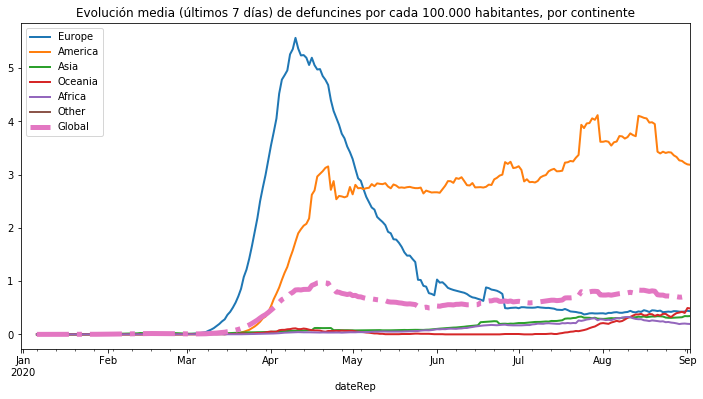

In [6]:
for continente in df['continentExp'].unique():
    df_continente[(df_continente['continentExp'] == continente)]['deaths/100_000'].rolling(7).mean().plot(figsize=(12, 6), lw=2, title="Evolución media (últimos 7 días) de defunciones por cada 100.000 habitantes, por continente", legend=True, label=f'{continente}')


df_planeta['deaths/100_000'].rolling(7).mean().plot(figsize=(12, 6),style='-.', lw=5, title="Evolución media (últimos 7 días) de defuncines por cada 100.000 habitantes, por continente", legend=True, label='Global')

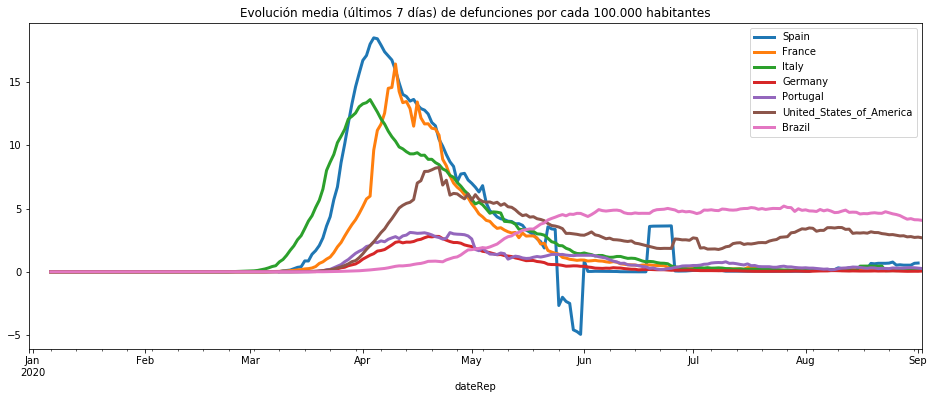

In [7]:
# Evolución media (últimos 7 días) de defunciones por cada 100.000 habitantes lista de paises
paises = ['Spain', 'France', 'Italy', 'Germany', 'Portugal', 'United_States_of_America', 'Brazil']
for pais in paises:
    df[(df['countriesAndTerritories'] == pais)]['deaths/100_000'] \
        .rolling(7)                                 \
        .mean()                                     \
        .plot(figsize=(16, 6), lw=3, title="Evolución media (últimos 7 días) de defunciones por cada 100.000 habitantes", legend=True, label=pais)

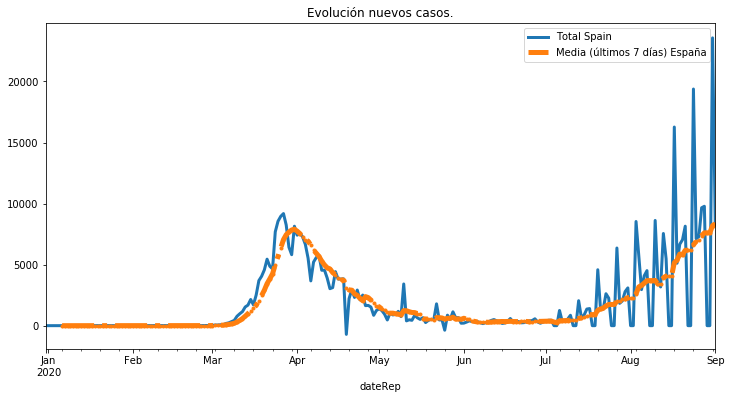

In [8]:
# Evolución de lista paises
# paises = ['Spain', 'France', 'Italy', 'Germany', 'Portugal']
paises = ['Spain']
for pais in paises:
    df[df['countriesAndTerritories'] == pais]['cases'].plot(figsize=(12, 6), title='Evolución nuevos casos.', lw=3, legend=True, label=f'Total {pais}')

df[df['countriesAndTerritories'] == 'Spain']['cases'].rolling(7).mean().plot(style='.-.', lw=5, legend=True, label=f'Media (últimos 7 días) España')


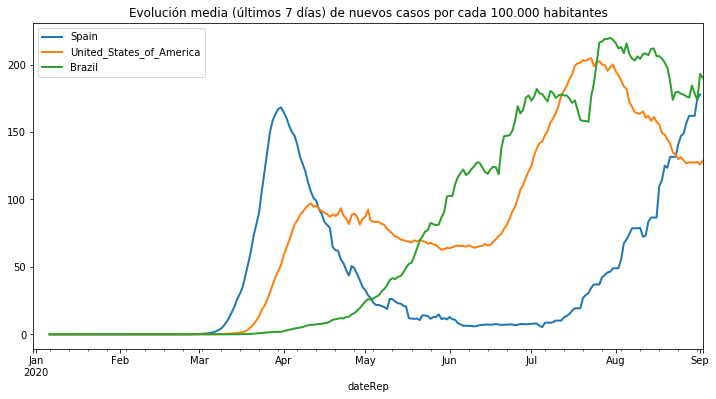

In [9]:
paises = ['Spain', 'United_States_of_America', 'Brazil']
for pais in paises:
   df[df['countriesAndTerritories'] == pais]['cases/100_000'].rolling(7).mean().plot(figsize=(12, 6), lw=2, title="Evolución media (últimos 7 días) de nuevos casos por cada 100.000 habitantes", legend=True, label=f'{pais}')

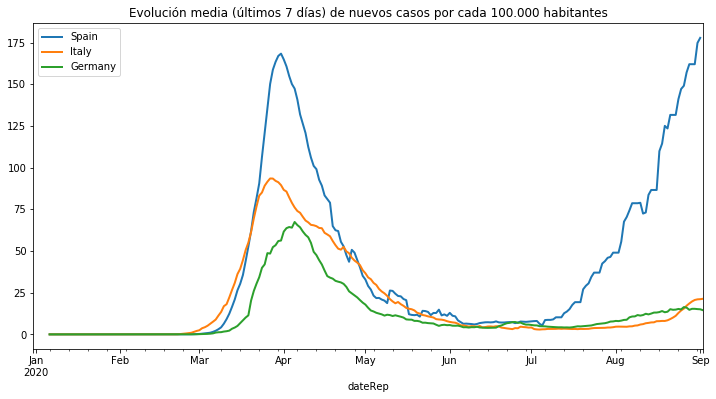

In [10]:
paises = ['Spain', 'Italy', 'Germany']
for pais in paises:
   df[df['countriesAndTerritories'] == pais]['cases/100_000'].rolling(7).mean().plot(figsize=(12, 6), lw=2, title="Evolución media (últimos 7 días) de nuevos casos por cada 100.000 habitantes", legend=True, label=f'{pais}')

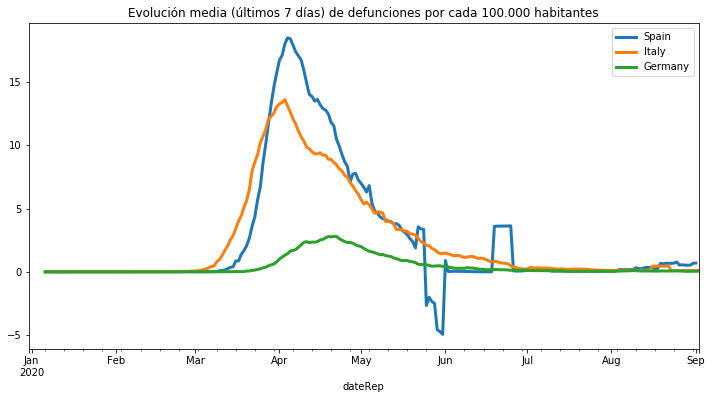

In [11]:
# Evolución media semanal (últimos 7 días) de defunciones por cada 100.000 habitantes, por continente
paises = ['Spain', 'Italy', 'Germany']
for pais in paises:
    df[(df['countriesAndTerritories'] == pais)]['deaths/100_000'] \
        .rolling(7)                                 \
        .mean()                                     \
        .plot(figsize=(12, 6), lw=3, title="Evolución media (últimos 7 días) de defunciones por cada 100.000 habitantes", legend=True, label=pais)

In [12]:
sum(df[df['countriesAndTerritories'] == 'Spain']['cases'])

470973

In [13]:
df[df['countriesAndTerritories'] == 'Spain'].tail()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cases/100_000,deaths/100_000
dateRep,,,,,,,,,,,,,
2020-08-28,28,8,2020,9779,15,Spain,ES,ESP,46937060.0,Europe,205.536947,208.342832,0.319577
2020-08-29,29,8,2020,0,0,Spain,ES,ESP,46937060.0,Europe,205.536947,0.000000,0.000000
2020-08-30,30,8,2020,0,0,Spain,ES,ESP,46937060.0,Europe,205.536947,0.000000,0.000000
2020-08-31,31,8,2020,23572,83,Spain,ES,ESP,46937060.0,Europe,221.096081,502.204441,1.768325
2020-09-01,1,9,2020,8115,58,Spain,ES,ESP,46937060.0,Europe,227.489749,172.891101,1.235697
